1. MNIST Database

In [1]:
#I use the MNIST data from sklearn.datasets
from sklearn.datasets import fetch_mldata 

import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
mnist = fetch_mldata('MNIST original')

In [3]:
print("Image Data Shape" , mnist.data.shape)

print("Label Data Shape", mnist.target.shape)

('Image Data Shape', (70000, 784))
('Label Data Shape', (70000,))


In [4]:
#Splitting Data into Training and Test Sets (MNIST)
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [5]:
# Exploring data 
print(train_img.shape)
print(train_lbl.shape)
print(test_img.shape)
print(test_lbl.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [6]:
# I subset training and testing sets for a quicker performance
train_img1=train_img[0:1000]
train_lbl1=train_lbl[0:1000]
test_img1=test_img[0:400]
test_lbl1=test_lbl[0:400]

In [7]:
# Showing the Images and Labels (MNIST)

(b) Visualization of data from MNIST database
i. Plot the first 25 images in the training set. Do all images of 9 look alike?

Yes, the images of 9 look alike, they all look like 9.

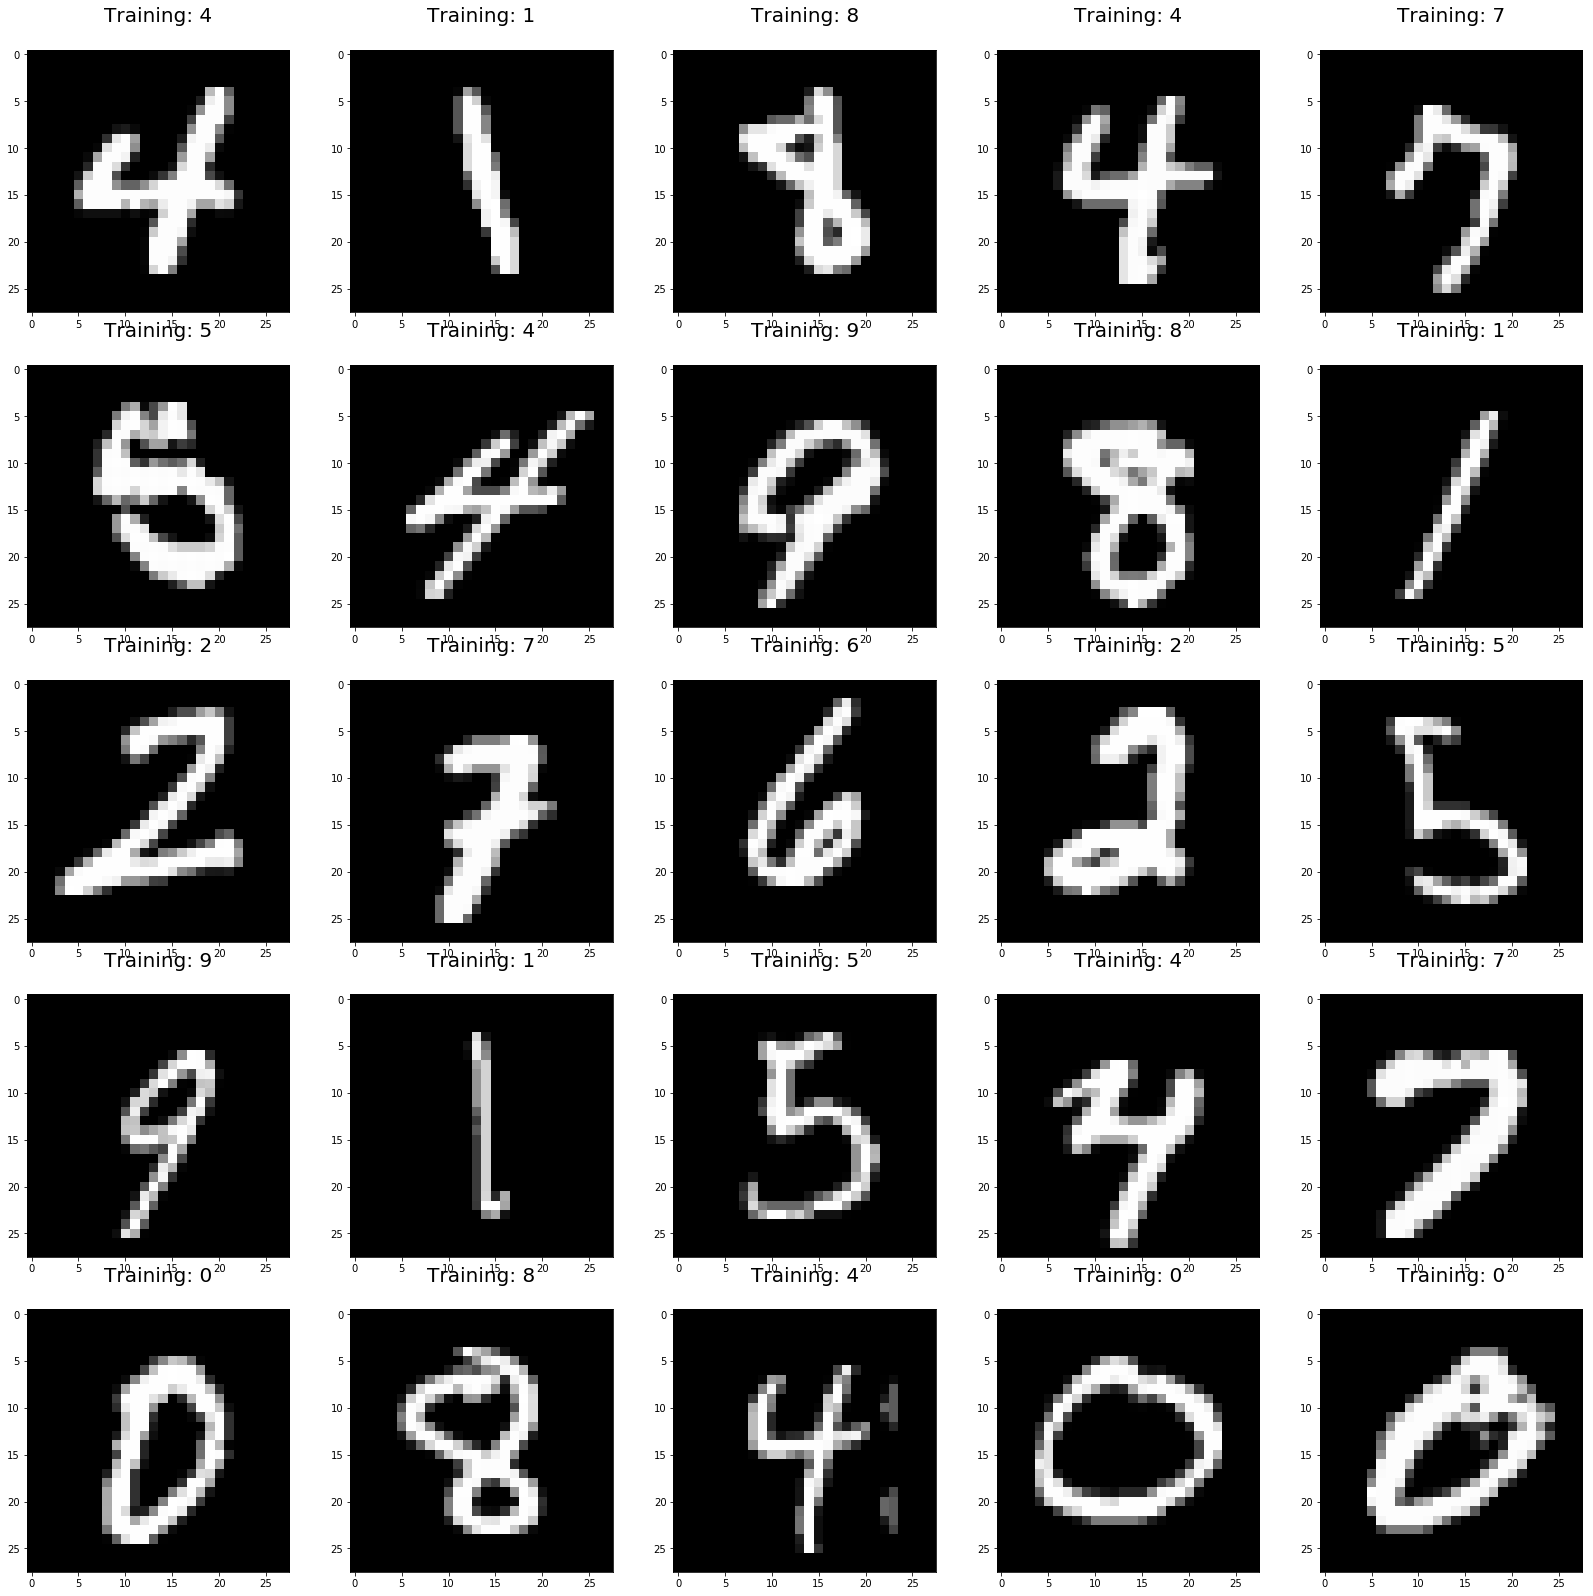

In [8]:
fig = plt.figure(figsize=(28,28))
for index, (image, label) in enumerate(zip(train_img[0:25], train_lbl[0:25])):
    plt.subplot(5, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

ii. Plot 15 randomly selected images from the test set without looking at the corresponding labels and try to guess them. Were all of your guesses correct?

Yes, I can guess them correctly.

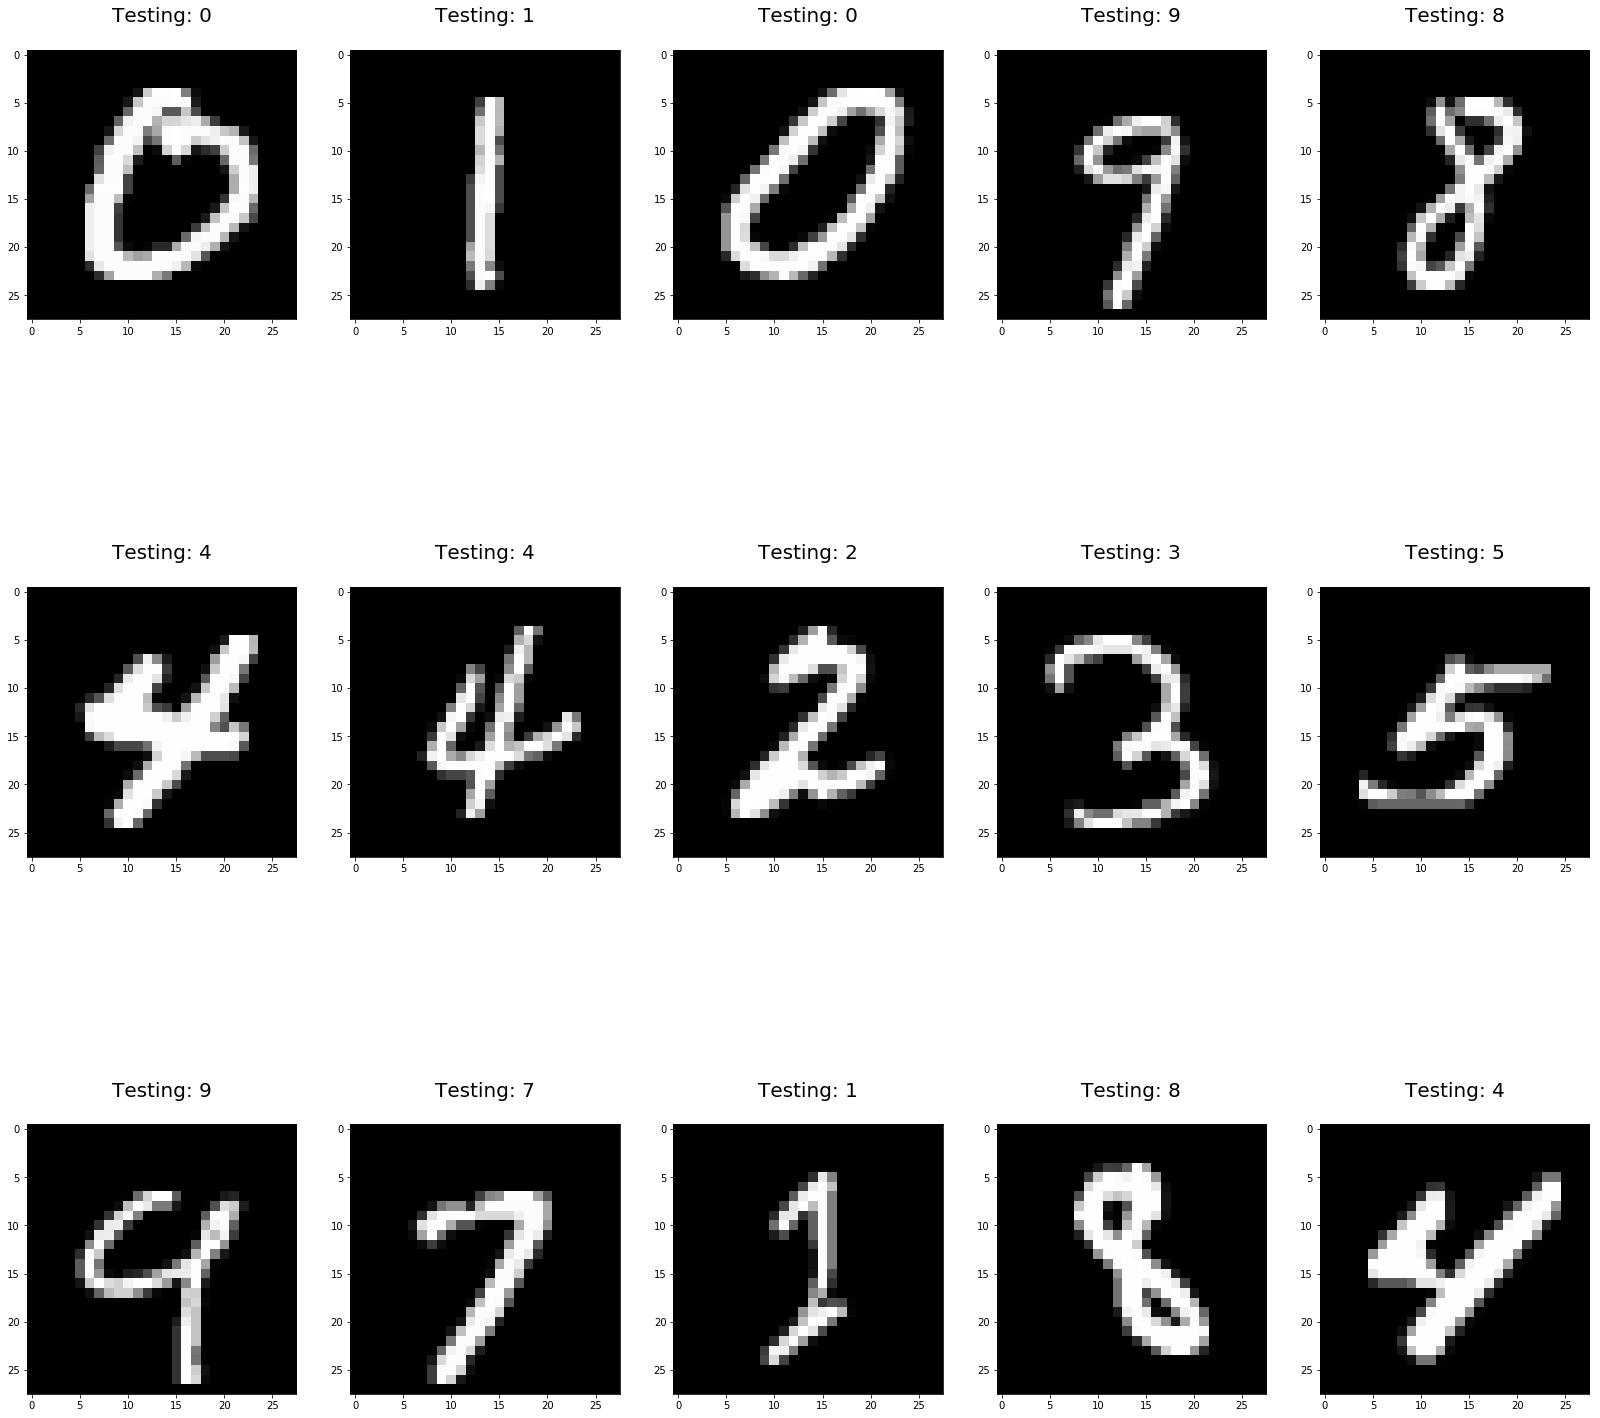

In [9]:
b=np.random.randint(0,1000,15)
ig = plt.figure(figsize=(28,28))
for index, (image, label) in enumerate(zip(train_img[b], train_lbl[b])):
    plt.subplot(3, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Testing: %i\n' % label, fontsize = 20)

iii. Let us explore the data even more. Find 2 different digits that look alike. Find 3 samples of the same digit that do not look alike at all.

The first two images of 6 and 4 look alike. The three samples of 9 above do not look quite alike.

(c) Classification using KNN on MNIST database

i. What is the nearest neighbor of a train sample, assuming it is included in the training set?

The nearest neighbor of a train sample is the k closest training samples in the feature space.
For example, if k = 1, then the object is simply assigned to the class of that single nearest neighbor.

ii. Write code for k-nearest neighbors with Euclidean metric (or use a software package). Find 5 nearest neighbors for the first 10 test samples and plot them together.

In [10]:
# create knn model with neighbors=5, metric=euclidean
knn_eu = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [11]:
knn_eu.fit(train_img1, train_lbl1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
# select 10 test sample to fit into the model
dis,ind = knn_eu.kneighbors(test_img1[0:10])

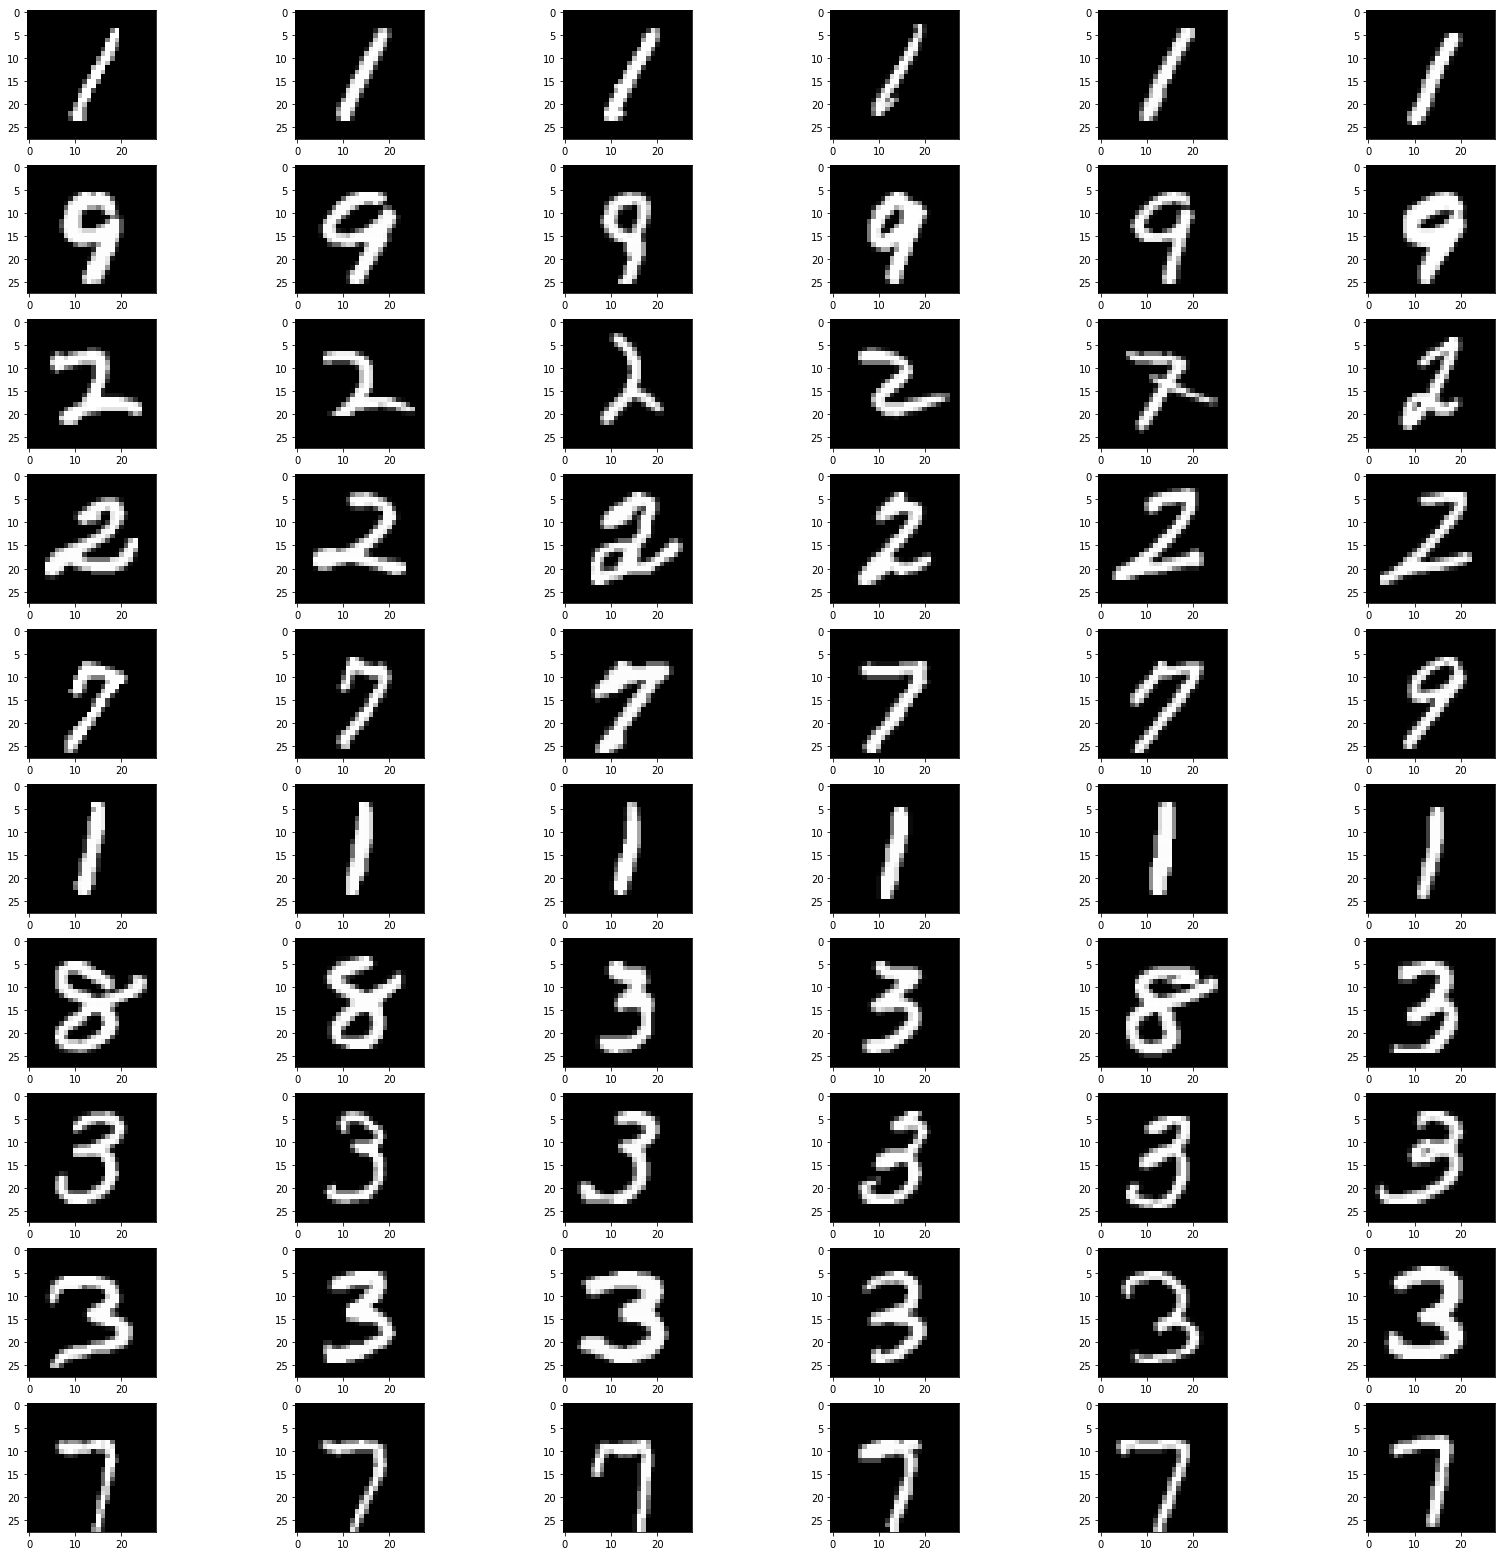

In [13]:
# create a likst to put the dis and ind of the 10 test samples
eu_list= []

for i in range (10):
    eu_list.append(test_img1[i])
    for each in ind[i]:
        eu_list.append(train_img[each])

#plot the images
fig5= plt.figure(figsize=(28,28))
for index, image in enumerate(eu_list):
    plt.subplot(10, 6, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)

iii. Test all 10000 digits in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of 1/k for k 2 {1,201,401,...,10001}. You are welcome to use smaller increments of k. Which k⇤ is the most suitable k among those values?

Note: Here I only subset 1000 samples from the test set.the train and test errors might be different compared to using a larger set. But the logic behind is the same.

In [14]:
#pred = knn_eu.predict(test_img1)

In [15]:
# Get the actual values for the test set.
#actual =test_lbl1[0:30]

# Compute the mean squared error of our predictions.
#mse = (((pred - actual) ** 2).sum()) / len(pred)
#print(knn.score(test_img1,test_lbl1))

In [16]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 1000, 200)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [17]:
# Loop over different values of k 
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')

    # Fit the model to the training data
    knn.fit(train_img1, train_lbl1)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_img1, train_lbl1)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(test_img1, test_lbl1)


In [18]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1,1000,200)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_img1, train_lbl1)
    y_pred = knn.predict(test_img1)
    scores.append(metrics.accuracy_score(test_lbl1, y_pred))

print(scores)

[0.875, 0.54249999999999998, 0.3775, 0.26000000000000001, 0.16250000000000001]


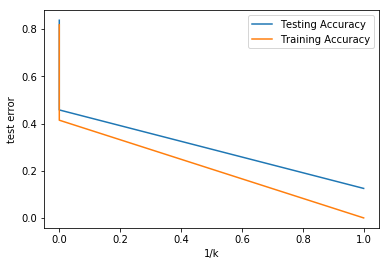

In [19]:
# Generate plot
#test error = 1 - test accuracy
plt.plot(1/neighbors, 1-test_accuracy, label = 'Testing Accuracy')
plt.plot(1/neighbors, 1-train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('1/k')
plt.ylabel('test error')
plt.show()

iv. Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N = {5000,10000,15000,...,55000,60000}. (You are welcome to choose smaller increments of N).

I defined my own metrics:When N ={200,400,600,800,1000}, Let k ={1,2,...,24,25}. 

In [20]:
Nsize = np.arange(200,1000,200)
Nsize

array([200, 400, 600, 800])

In [21]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_img1, train_lbl1)
    y_pred = knn.predict(test_img1)
    scores.append(metrics.accuracy_score(test_lbl1, y_pred))

print(max(scores))

0.875


In [22]:
k_range = range(1, 26)

train_accuracy = np.empty(len(neighbors))
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(train_img1, train_lbl1)
    y_pred = knn.predict(test_img1)

print train_accuracy, k
#scores.append(metrics.accuracy_score(test_lbl1, y_pred))

#plt.plot(k_range, scores)
#plt.xlabel('Value of K for KNN')
#plt.ylabel('Testing Accuracy')

[ 0.   0.2  0.4  0.6  0.8] 25


(d) Plot the k nearest neighbors of some of misclassified samples.

In [23]:
pred = knn_eu.predict(test_img1)

index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl1, pred):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1    

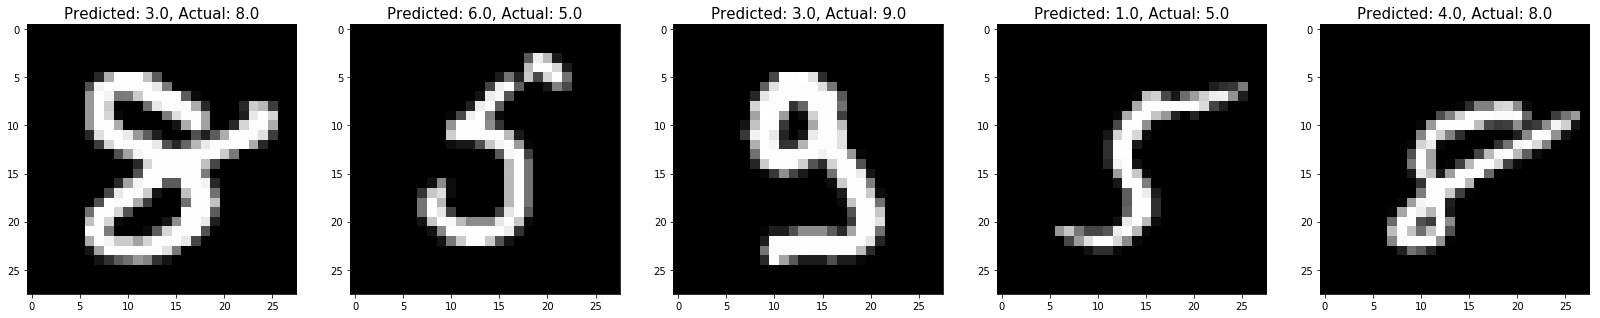

In [24]:
plt.figure(figsize=(28,28))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img1[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(pred[badIndex], test_lbl1[badIndex]), fontsize = 15)

(e) Replace the Euclidean metric with the following metrics and test them. Summa- rize the test errors (i.e., when k = k*) in a table.

i. Minkowski Distance:

A. which becomes Manhattan Distance with p = 1 

B. with log10(p) 2 {0.1,.2,.3,...,1}

C. which becomes Chebyshev Distance with p ! 1

In [25]:
knn_man = KNeighborsClassifier(n_neighbors=5, metric='manhattan', p=1,weights='distance')
knn_man.fit(train_img1, train_lbl1)
pred_man = knn_man.predict(test_img1)
print(metrics.accuracy_score(test_lbl1, y_pred))

0.81


In [26]:
#B. with log10(p) 2 {0.1,.2,.3,...,1}
#calculate p
numbers=np.arange(0.1, 1.1, 0.1)
p_num=list(map(lambda x: 10**x, numbers))


In [27]:
for p in p_num:
    knn_min = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=p,weights='distance')
    knn_min.fit(train_img1, train_lbl1)
    pred_min = knn_min.predict(test_img1)
    print(accuracy_score(test_lbl1, pred_min))

0.875
0.89
0.8925
0.8975
0.9
0.9
0.9
0.9
0.8975
0.8975


In [28]:
knn_che = KNeighborsClassifier(n_neighbors=5, metric='chebyshev',weights='distance')
knn_che.fit(train_img1, train_lbl1)
pred_che = knn_che.predict(test_img1)
print(metrics.accuracy_score(test_lbl1, pred_che))

0.52


The best error rate is achived where the accuracy score is the highest using Minkowski Distance with log10(p)=(0.5,0.6,0.7,0.8)